In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('heart.csv')
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
# Split the dataset into features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical columns using one-hot encoding
ct = ColumnTransformer([('encoder', OneHotEncoder(), [2, 6, 8, 10])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')


Epoch 1/70
37/37 [==============================] - 1s 7ms/step - loss: 0.5094 - accuracy: 0.7700 - val_loss: 0.4368 - val_accuracy: 0.8299
Epoch 2/70
37/37 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8637 - val_loss: 0.3975 - val_accuracy: 0.8367
Epoch 3/70
37/37 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.8705 - val_loss: 0.3893 - val_accuracy: 0.8503
Epoch 4/70
37/37 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.8773 - val_loss: 0.3760 - val_accuracy: 0.8503
Epoch 5/70
37/37 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.8773 - val_loss: 0.3743 - val_accuracy: 0.8503
Epoch 6/70
37/37 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.8859 - val_loss: 0.3736 - val_accuracy: 0.8571
Epoch 7/70
37/37 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.8859 - val_loss: 0.3692 - val_accuracy: 0.8367
Epoch 8/70
37/37 [==

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the heart failure prediction dataset
df = pd.read_csv('heart.csv')
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
# Separate the features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


# Convert categorical columns using one-hot encoding
ct = ColumnTransformer([('encoder', OneHotEncoder(), [2, 6, 8, 10])], remainder='passthrough')
X = ct.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f'Test set accuracy: {accuracy:.4f}')


Test set accuracy: 0.8804


1    508
0    410
Name: HeartDisease, dtype: int64


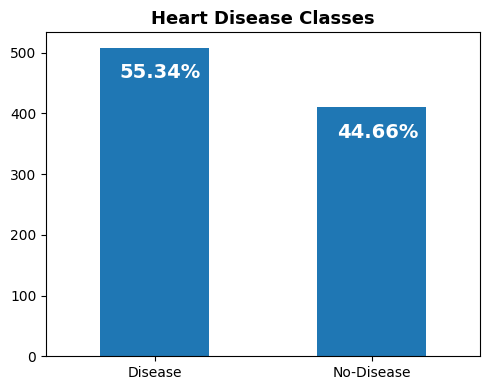

In [ ]:
import matplotlib.pyplot as plt
print(df.HeartDisease.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No-Disease"]
ax = df.HeartDisease.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

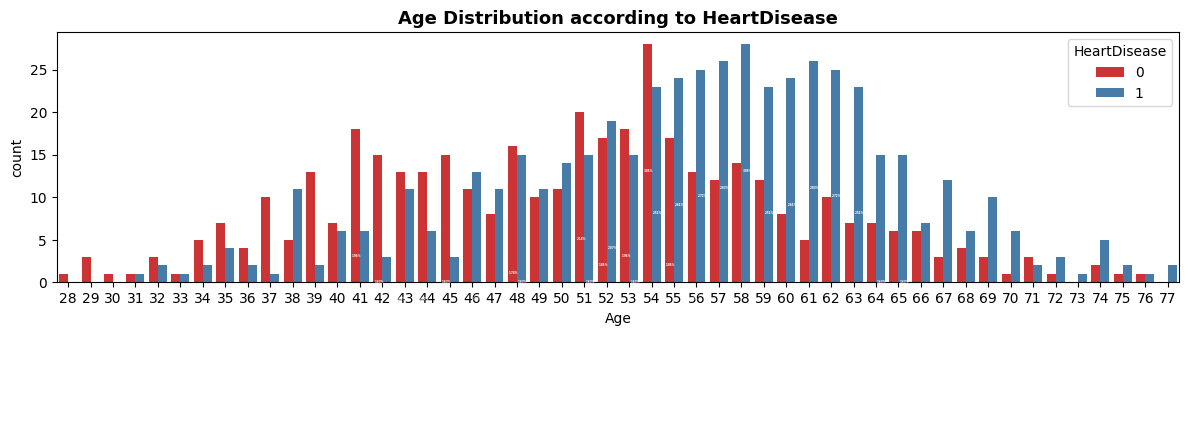

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5))
name = df['Age']
ax = sns.countplot(x='Age', hue='HeartDisease', data=df, palette='Set1')
ax.set_title("Age Distribution according to HeartDisease", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=2,
                color='white', weight = 'bold')  
plt.tight_layout()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df.HeartDisease, random_state=0)

In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                  Name     Score
0                  KNN  0.704348
1                  SVC  0.704348
2  Logistic Regression  0.856522
3        Random Forest  0.882609


In [ ]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=10)
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

                  Name     Score
0                  KNN  0.711359
1                  SVC  0.718944
2  Logistic Regression  0.861598
3        Random Forest  0.868144


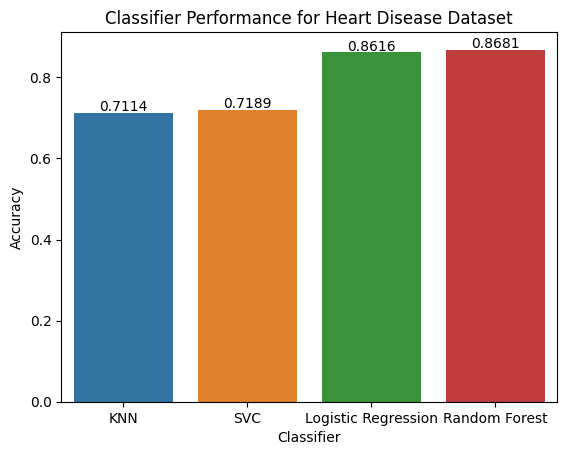

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
axis.set_title("Classifier Performance for Heart Disease Dataset")
plt.show()